In [1]:
import pandas as pd, numpy as np
from db_queries import get_ids, get_outputs, get_location_metadata, get_covariate_estimates
from get_draws.api import get_draws
import scipy.stats
from operator import attrgetter
from math import sqrt, pi
import matplotlib.pyplot as plt

In [2]:
# define location and age group IDs of interest

locs = [165, 161, 214, 182] # pakistan, bangladesh, nigeria, malawi
ages = list(range(7,16))
# reminder, always want sex_id=2 (female)

In [3]:
# mean hemoglobin concentration
mean = get_draws('modelable_entity_id',
                10487,
                source='epi',
                location_id=locs,
                age_group_id=ages,
                sex_id=2,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
mean.head()

,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_997,draw_998,draw_999,location_id,measure_id,metric_id,modelable_entity_id,sex_id,year_id,model_version_id
0,7,131.576669,130.006851,126.753823,128.018065,133.273591,131.115555,130.538169,127.788556,127.888119,...,131.693836,129.286983,129.131233,161,19,3,10487,2,2019,474044
1,8,118.922773,126.221582,123.354380,126.262134,124.932018,122.562494,124.733401,123.766130,126.417171,...,123.436502,123.562551,128.478574,161,19,3,10487,2,2019,474044
2,9,119.445416,119.744885,123.663548,124.283216,118.579743,124.817976,123.868556,121.465009,121.658608,...,120.869506,120.472913,125.833589,161,19,3,10487,2,2019,474044
3,10,125.283728,125.009121,119.397039,122.817539,123.870315,121.480207,122.020435,124.570332,124.744182,...,125.456108,120.019112,122.695076,161,19,3,10487,2,2019,474044
4,11,125.122521,121.147369,124.487696,128.703954,127.822311,125.583439,122.830292,124.109611,122.808416,...,126.128345,122.630509,120.700463,161,19,3,10487,2,2019,474044


In [4]:
# hemoglobin distribution standard deviation
sd = get_draws('modelable_entity_id',
                10488,
                source='epi',
                location_id=locs,
                age_group_id=ages,
                sex_id=2,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
sd.head()

,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_997,draw_998,draw_999,location_id,measure_id,metric_id,modelable_entity_id,sex_id,year_id,model_version_id
0,7,13.275545,10.520743,12.478364,11.074315,10.319840,9.552074,11.482975,12.820968,11.568589,...,11.489875,12.298117,9.942485,161,19,3,10488,2,2019,474047
1,8,13.539543,11.400473,10.763228,14.080062,11.942807,11.324351,11.840090,12.247414,13.130775,...,12.780025,12.573772,12.782688,161,19,3,10488,2,2019,474047
2,9,13.528640,13.927886,14.721699,15.840077,11.072700,15.942453,12.677813,15.067630,13.357706,...,13.921116,12.567939,13.100151,161,19,3,10488,2,2019,474047
3,10,13.207735,13.479330,11.098589,12.029322,11.833765,13.670128,13.568723,12.334150,11.460925,...,13.722549,13.112078,11.246742,161,19,3,10488,2,2019,474047
4,11,14.281189,15.560005,13.597733,12.801608,13.592397,11.282292,17.420670,15.393633,13.681489,...,14.033802,13.578819,15.315098,161,19,3,10488,2,2019,474047


In [9]:
# get age-specific fertility rate
asfr = get_covariate_estimates(13, 
                               location_id=locs,
                               age_group_id=ages,
                               sex_id=2,
                               year_id=2019,
                               gbd_round_id=6,
                               decomp_step='step4')
asfr.head()

,model_version_id,covariate_id,covariate_name_short,location_id,location_name,year_id,age_group_id,age_group_name,sex_id,sex,mean_value,lower_value,upper_value
0,34911,13,ASFR,161,Bangladesh,2019,7,10 to 14,2,Female,0.000760,0.000338,0.001574
1,34911,13,ASFR,161,Bangladesh,2019,8,15 to 19,2,Female,0.058349,0.049242,0.068484
2,34911,13,ASFR,161,Bangladesh,2019,9,20 to 24,2,Female,0.117476,0.100709,0.135509
3,34911,13,ASFR,161,Bangladesh,2019,10,25 to 29,2,Female,0.100334,0.090284,0.111058
4,34911,13,ASFR,161,Bangladesh,2019,11,30 to 34,2,Female,0.054086,0.047435,0.061388


In [10]:
# get still birth to live birht ratio (not age-specific)
still = get_covariate_estimates(2267, 
                                location_id=locs,
                                year_id=2019,
                                gbd_round_id=6,
                                decomp_step='step4')
still.head()

,model_version_id,covariate_id,covariate_name_short,location_id,location_name,year_id,age_group_id,age_group_name,sex_id,sex,mean_value,lower_value,upper_value
0,32394,2267,stillbirth_livebirth_ratio,161,Bangladesh,2019,22,All Ages,3,Both,0.014447,0.014447,0.014447
1,32394,2267,stillbirth_livebirth_ratio,165,Pakistan,2019,22,All Ages,3,Both,0.020700,0.020700,0.020700
2,32394,2267,stillbirth_livebirth_ratio,182,Malawi,2019,22,All Ages,3,Both,0.014477,0.014477,0.014477
3,32394,2267,stillbirth_livebirth_ratio,214,Nigeria,2019,22,All Ages,3,Both,0.026686,0.026686,0.026686


In [11]:
mean.to_excel("mean.xlsx")
sd.to_excel("sd.xlsx")
asfr.to_excel("asfr.xlsx")
still.to_excel("sb.xlsx")

In [7]:
thresholds = pd.read_csv("/share/mnch/anemia/code/reference/model/anemia_thresholds.csv")
thresholds.to_excel("thresholds.xlsx")

In [20]:
# now run r code!

In [12]:
anemia_prev = pd.read_csv('updated_anemia_prevalence_from_r.csv')
anemia_prev.head()

,measure_id,location_id,year_id,age_group_id,sex_id,draw,pregnant,mean,stdev,variance,...,hgb_upper_anemic,mild,moderate,severe,anemic,mild_preg,moderate_preg,severe_preg,anemic_preg,prev_pregnant
0,5,161,2019,7,2,...1,0,0.000000,0.000000,0.000000,...,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,161,2019,7,2,draw_0,0,131.576669,13.275545,176.240106,...,115,0.046247,0.056381,0.002305,0.104933,NaN,NaN,NaN,NaN,NaN
2,5,161,2019,7,2,draw_1,0,130.006851,10.520743,110.686023,...,115,0.042483,0.037429,0.000758,0.080670,NaN,NaN,NaN,NaN,NaN
3,5,161,2019,7,2,draw_10,0,126.753823,12.478364,155.709559,...,115,0.070945,0.088439,0.002754,0.162138,NaN,NaN,NaN,NaN,NaN
4,5,161,2019,7,2,draw_100,0,128.018065,11.074315,122.640445,...,115,0.058116,0.057635,0.001294,0.117045,NaN,NaN,NaN,NaN,NaN


In [14]:
draws = [c for c in np.unique(anemia_prev['draw']) if 'draw' in c]
anemia_prev = anemia_prev.loc[anemia_prev['draw'].isin(draws)]
anemia_prev.head()

,measure_id,location_id,year_id,age_group_id,sex_id,draw,pregnant,mean,stdev,variance,...,hgb_upper_anemic,mild,moderate,severe,anemic,mild_preg,moderate_preg,severe_preg,anemic_preg,prev_pregnant
1,5,161,2019,7,2,draw_0,0,131.576669,13.275545,176.240106,...,115,0.046247,0.056381,0.002305,0.104933,NaN,NaN,NaN,NaN,NaN
2,5,161,2019,7,2,draw_1,0,130.006851,10.520743,110.686023,...,115,0.042483,0.037429,0.000758,0.080670,NaN,NaN,NaN,NaN,NaN
3,5,161,2019,7,2,draw_10,0,126.753823,12.478364,155.709559,...,115,0.070945,0.088439,0.002754,0.162138,NaN,NaN,NaN,NaN,NaN
4,5,161,2019,7,2,draw_100,0,128.018065,11.074315,122.640445,...,115,0.058116,0.057635,0.001294,0.117045,NaN,NaN,NaN,NaN,NaN
5,5,161,2019,7,2,draw_101,0,133.273591,10.319840,106.499094,...,115,0.025255,0.021445,0.000449,0.047149,NaN,NaN,NaN,NaN,NaN


In [15]:
anemia = (anemia_prev.rename(columns={'anemic':'total'})
          .groupby(['location_id','age_group_id']).describe(percentiles=[0.025,0.975]))
anemia.head()

measure_id                                      \
                              count mean  std  min 2.5%  50% 97.5%  max   
location_id age_group_id                                                  
161         7                1000.0  5.0  0.0  5.0  5.0  5.0   5.0  5.0   
            8                1000.0  5.0  0.0  5.0  5.0  5.0   5.0  5.0   
            9                1000.0  5.0  0.0  5.0  5.0  5.0   5.0  5.0   
            10               1000.0  5.0  0.0  5.0  5.0  5.0   5.0  5.0   
            11               1000.0  5.0  0.0  5.0  5.0  5.0   5.0  5.0   

                         year_id          ... anemic_preg            \
                           count    mean  ...       97.5%       max   
location_id age_group_id                  ...                         
161         7             1000.0  2019.0  ...         NaN       NaN   
            8             1000.0  2019.0  ...    0.068986  0.109382   
            9             1000.0  2019.0  ...    0.095782  0.145639   
            10            1000.0  2019.0  ...    0.099894  0.133652   
            11            1000.0  2019.0  ...    0.119388  0.180316   

                         prev_pregnant                                    \
                                 count      mean           std       min   
location_id age_group_id                                                   
161         7                      0.0       NaN           NaN       NaN   
            8                   1000.0  0.052362  0.000000e+00  0.052362   
            9                   1000.0  0.105422  2.776946e-17  0.105422   
            10                  1000.0  0.090039  2.776946e-17  0.090039   
            11                  1000.0  0.048537  1.388473e-17  0.048537   

                                                                  
                              2.5%       50%     97.5%       max  
location_id age_group_id                                          
161         7                  NaN       NaN       NaN       NaN  
            8             0.052362  0.052362  0.052362  0.052362  
            9             0.105422  0.105422  0.105422  0.105422  
            10            0.090039  0.090039  0.090039  0.090039  
            11            0.048537  0.048537  0.048537  0.048537  

[5 rows x 200 columns]

In [16]:
# get anemia impairment prevalence 

total_anemia_prev = get_draws('rei_id',
                             [192,205,206,207],
                             source='como',
                             measure_id=5,
                             location_id=locs,
                             age_group_id=ages,
                             sex_id=2,
                             year_id=2019,
                             gbd_round_id=6,
                             decomp_step='step5',
                             status='latest')
total_anemia_prev = total_anemia_prev.loc[total_anemia_prev.cause_id == 294]
total_anemia_prev.head()

,age_group_id,cause_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,...,draw_996,draw_997,draw_998,draw_999,location_id,measure_id,rei_id,sex_id,year_id,metric_id
0,7,294,0.104821,0.080557,0.162058,0.116975,0.047083,0.053879,0.089916,0.150235,...,0.029290,0.077216,0.119124,0.081283,161,5,192,2,2019,3
1,7,294,0.046202,0.042425,0.070916,0.058084,0.025219,0.030357,0.044408,0.065159,...,0.017173,0.038398,0.054820,0.044401,161,5,205,2,2019,3
2,7,294,0.056316,0.037374,0.088390,0.057597,0.021416,0.023170,0.044318,0.082254,...,0.011986,0.037769,0.062337,0.036287,161,5,206,2,2019,3
3,7,294,0.002303,0.000757,0.002752,0.001293,0.000448,0.000352,0.001189,0.002821,...,0.000131,0.001049,0.001968,0.000595,161,5,207,2,2019,3
192,8,294,0.474032,0.252388,0.326437,0.285159,0.293520,0.356156,0.297994,0.328688,...,0.333374,0.342240,0.336896,0.220239,161,5,192,2,2019,3


In [17]:
gbd_prev = total_anemia_prev.set_index([c for c in total_anemia_prev.columns if 'draw' not in c])
gbd_median = pd.DataFrame(gbd_prev.median(axis=1)).rename(columns={0:'median'})
gbd_lcl = pd.DataFrame(gbd_prev.quantile(q=0.025, axis=1)).rename(columns={0.025:'lower'})
gbd_ucl = pd.DataFrame(gbd_prev.quantile(q=0.975, axis=1)).rename(columns={0.975:'upper'})
gbd_prev = gbd_median.merge(gbd_lcl, right_index=True, left_index=True)
gbd_prev = gbd_prev.merge(gbd_ucl, right_index=True, left_index=True)
gbd_prev = gbd_prev.reset_index()
gbd_prev = gbd_prev[['location_id','age_group_id','rei_id','median','lower','upper']]
gbd_prev.head()

,location_id,age_group_id,rei_id,median,lower,upper
0,161,7,192,0.109332,0.039799,0.200998
1,161,7,205,0.052076,0.021601,0.086237
2,161,7,206,0.055074,0.017670,0.116562
3,161,7,207,0.001487,0.000303,0.004504
4,161,8,192,0.284017,0.162655,0.427188


In [18]:
def plot_calculated_vs_pulled(location_ids, severities):
    for severity in severities:
        for location_id in location_ids:
    
            if location_id == 161:
                loc_name = 'Bangladesh'
            elif location_id == 165:
                loc_name = 'Pakistan'
            elif location_id == 214:
                loc_name = 'Nigeria'
            else:
                loc_name = 'Malawi'

            if severity == 'mild':
                rei_id = 205
            elif severity == 'moderate':
                rei_id = 206
            elif severity == 'severe':
                rei_id = 207
            else: 
                rei_id = 192

            calc = anemia.reset_index()
            calc = calc.loc[calc.location_id == location_id]
        
            gbd = gbd_prev.loc[gbd_prev.location_id == location_id]
            gbd = gbd.loc[gbd.rei_id == rei_id]
            
            fig, ax = plt.subplots()

            plt.plot(gbd['age_group_id'], gbd['median'] * 100)
            plt.plot(calc['age_group_id'], calc[f'{severity}','mean'] * 100)
            plt.fill_between(gbd['age_group_id'], gbd['upper']*100, gbd['lower']*100, alpha=0.3)
            plt.fill_between(calc['age_group_id'], calc[f'{severity}','97.5%']*100, calc[f'{severity}','2.5%']*100, alpha=0.3)
            plt.legend(['Pulled (with 95% UI)','Calculated'])
            plt.title(f'{loc_name} - {severity.capitalize()} Anemia Prevalence by Age Group (Females)')
            plt.xlabel('Age Group ID')
            plt.ylabel('Percentage')

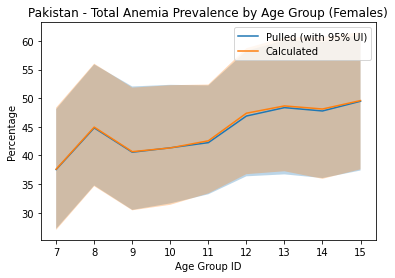

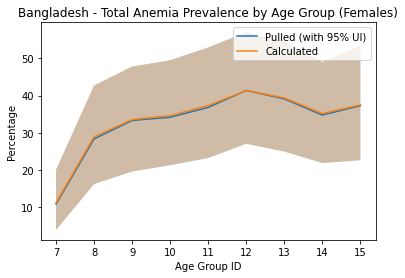

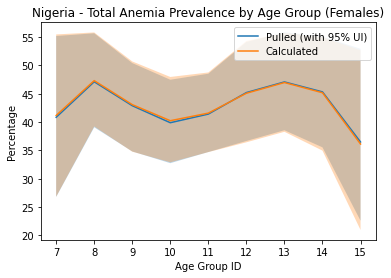

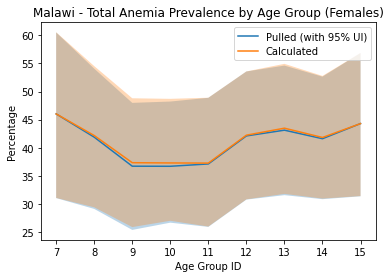

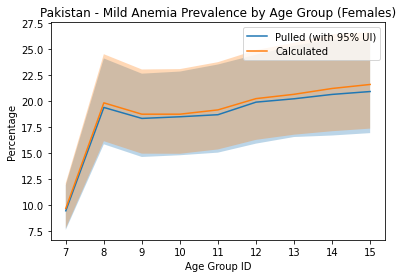

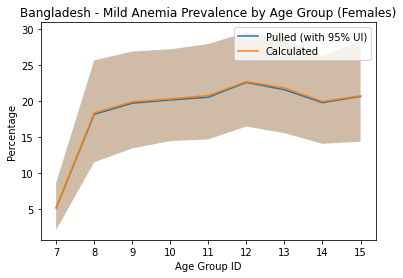

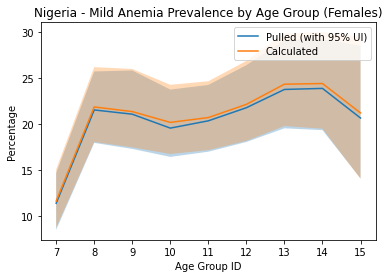

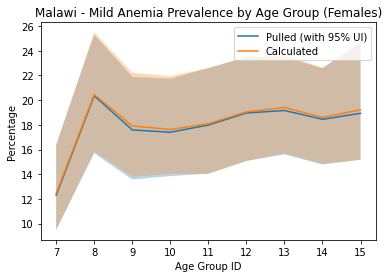

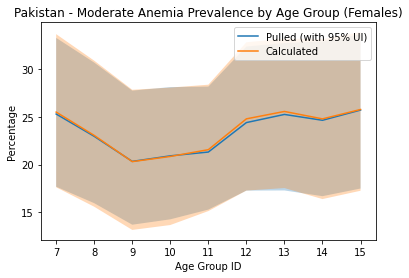

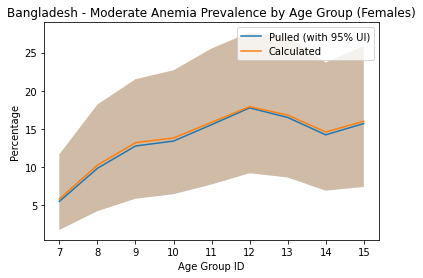

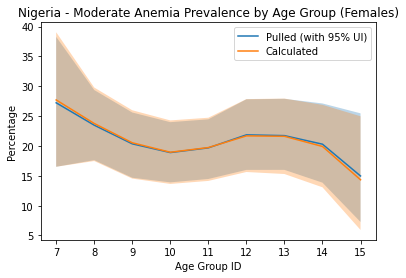

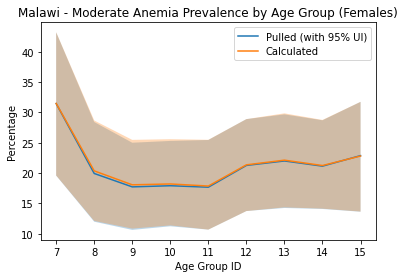

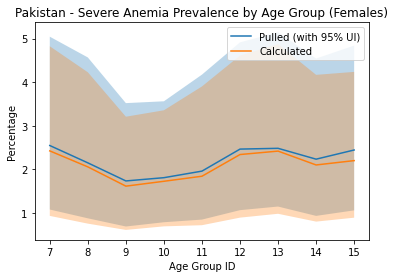

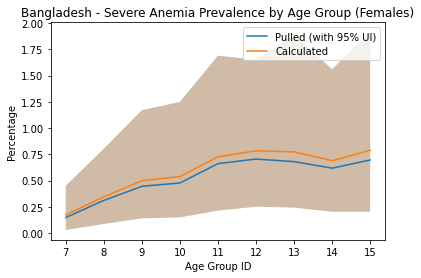

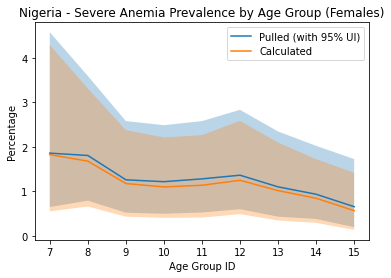

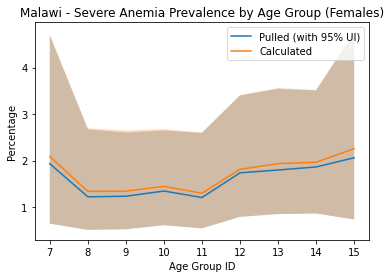

In [19]:
plot_calculated_vs_pulled(locs, ['total','mild','moderate','severe'])